In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

In [84]:
strSource = r"D:\ML\work\StadtteilprofileBerichtsjahr2018_4.csv"
df = pd.read_csv(strSource, sep=';', header=0, encoding='utf-8')

In [85]:
X = df.loc[:,df.columns.difference(['id','Stadtteil','Cluster'])]
y = df.loc[:,['Cluster']].to_numpy().ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

In [86]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Original number of features: 55
Reduced number of features: 5
Durch Funktionen erklärte Varianz: [0.41131766 0.28187357 0.15630754 0.10310272 0.04739851]


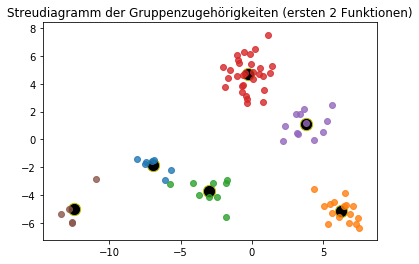

In [87]:
X_lda = lda.transform(X_train)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
print('Durch Funktionen erklärte Varianz:', lda.explained_variance_ratio_)

plt.figure()
X_mean=lda.transform(lda.means_)
plt.scatter(X_mean[:, 0], X_mean[:, 1],  s=150, c='black',cmap=plt.cm.rainbow, edgecolor='y')

for i in range(len(lda.classes_)):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], alpha=.8)

plt.title('Streudiagramm der Gruppenzugehörigkeiten (ersten 2 Funktionen)')
plt.show()

In [88]:
y_pred = lda.predict(X_test)

print('Score train data:', lda.score(X_train,y_train))
print('Score test data:', lda.score(X_test,y_test))
print('Label Testdata true:', y_test)
print('Label Testdata pred:', y_pred)

Score train data: 1.0
Score test data: 0.8
Label Testdata true: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
Label Testdata pred: [3 1 2 0 1 4 5 3 0 1 1 3 3 3 3 5 2 3 1 3]


In [89]:
estimator = RandomForestClassifier(max_depth=2, random_state=8)
selector = RFE(estimator, 38, step=1)
selector.fit(X, y)
X_select = selector.transform(X)

X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(X_select, y, test_size=0.2, random_state=8, stratify=y)

lda_select = LinearDiscriminantAnalysis()
lda_select.fit(X_select_train,y_select_train)
y_select_pred = lda_select.predict(X_select_test)

print('Score train data:', lda_select.score(X_select_train,y_select_train))
print('Score test data:', lda_select.score(X_select_test,y_select_test))
print('Label Testdata true:', y_select_test)
print('Label Testdata pred:', y_select_pred)

Score train data: 0.9873417721518988
Score test data: 0.9
Label Testdata true: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
Label Testdata pred: [4 1 3 0 1 4 0 3 0 4 1 3 3 3 3 5 5 3 1 3]


In [90]:
lda_reduse = LinearDiscriminantAnalysis(n_components=4)
X_reduse_train = lda_reduse.fit_transform(X_train, y_train)
X_reduse_test = lda_reduse.transform(X_test)

lda_reduce = LinearDiscriminantAnalysis()
lda_reduce.fit(X_reduse_train, y_train)
y_reduce_pred = lda_reduce.predict(X_reduse_test)

print('Score train data:', lda_reduce.score(X_reduse_train,y_train))
print('Score test data:', lda_reduce.score(X_reduse_test,y_test))
print('Label Testdata true:', y_test)
print('Label Testdata pred:', y_reduce_pred)

Score train data: 1.0
Score test data: 0.8
Label Testdata true: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
Label Testdata pred: [2 1 2 0 1 4 5 3 0 1 1 3 3 3 3 5 2 3 1 3]


In [91]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Score train data:', clf.score(X_train,y_train))
print('Score test data:', clf.score(X_test,y_test))
print('Label Testdata true:', y_test)
print('Label Testdata pred:', y_pred)

Score train data: 1.0
Score test data: 1.0
Label Testdata true: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
Label Testdata pred: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]


In [92]:
clf = make_pipeline(SelectKBest(f_classif, k=38), LinearSVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Score train data:', clf.score(X_train,y_train))
print('Score test data:', clf.score(X_test,y_test))
print('Label Testdata true:', y_test)
print('Label Testdata pred:', y_pred)

Score train data: 0.9873417721518988
Score test data: 1.0
Label Testdata true: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
Label Testdata pred: [4 1 3 0 1 4 2 3 0 4 1 3 3 3 3 5 2 3 1 3]
